In [23]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [25]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [26]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 43s 100ms/step - loss: 0.3622 - accuracy: 0.8921 - val_loss: 0.0774 - val_accuracy: 0.9783
Epoch 2/15
422/422 [==============================] - 42s 99ms/step - loss: 0.1084 - accuracy: 0.9671 - val_loss: 0.0582 - val_accuracy: 0.9840
Epoch 3/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0820 - accuracy: 0.9750 - val_loss: 0.0439 - val_accuracy: 0.9877
Epoch 4/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0702 - accuracy: 0.9777 - val_loss: 0.0385 - val_accuracy: 0.9883
Epoch 5/15
422/422 [==============================] - 42s 100ms/step - loss: 0.0598 - accuracy: 0.9810 - val_loss: 0.0369 - val_accuracy: 0.9903
Epoch 6/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0550 - accuracy: 0.9828 - val_loss: 0.0359 - val_accuracy: 0.9900
Epoch 7/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0504 - accuracy: 0.9841 - val_loss: 0.0330 - val_accurac

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024523604661226273
Test accuracy: 0.9915000200271606


In [29]:
!pip3 install shap

     |████████████████████████████████| 356 kB 5.1 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491641 sha256=74c336e12938546756e5c48ca7560bd6c5574bab03f0b0eae3ea6ee4a074f787
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [30]:
import shap
import numpy as np

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


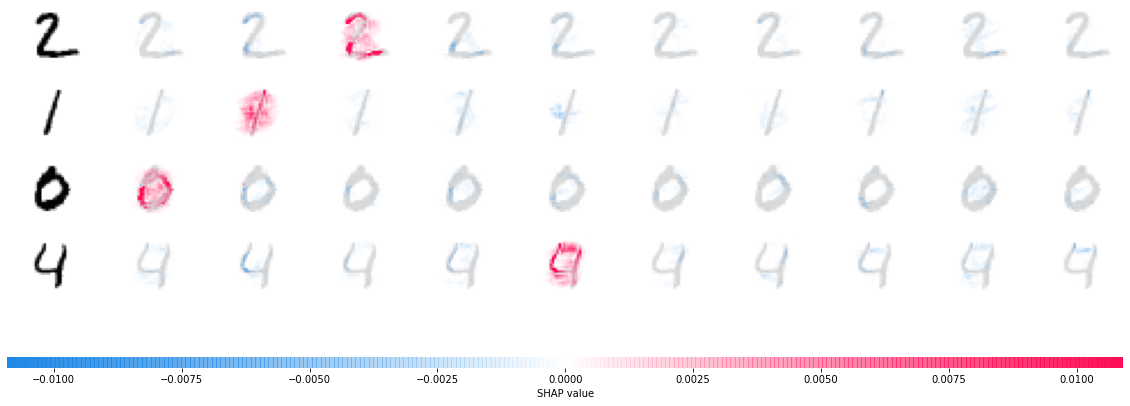

In [31]:
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

e = shap.DeepExplainer(model, background)
shap_values = e.shap_values(x_test[1:5])

shap.image_plot(shap_values, -x_test[1:5])

In [ ]:
!pip3 install jupyterlab
!python3 -m jupyter nbextension enable --py widgetsnbextension
!python3 -m jupyter labextension install @jupyter-widgets/jupyterlab-manager


     |████████████████████████████████| 8.6 MB 4.9 MB/s 
     |████████████████████████████████| 56 kB 3.4 MB/s 
     |████████████████████████████████| 428 kB 53.9 MB/s 
     |████████████████████████████████| 392 kB 49.2 MB/s 
     |████████████████████████████████| 68 kB 6.0 MB/s 
     |████████████████████████████████| 112 kB 69.1 MB/s 
     |████████████████████████████████| 77 kB 6.4 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
ERROR: pip's dependency resolver does

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
-\|/-\|/-\|/-\|/-\|/-\|/-\|/-Building jupyterlab assets (production, minimized)
-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [33]:
@interact
def show_articles_more_than(column='claps', x=5000):
    return []

NameError: ignored